<a href="https://colab.research.google.com/github/AlvaroGamboa/ReconocimientoEmocionesAudio/blob/main/BD_Ravdess_Preprocesammiento_Limpieza_de_Ruido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyAudioAnalysis
!pip install eyed3
!pip install pydub

     |████████████████████████████████| 41.3 MB 1.1 MB/s 
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264389 sha256=5f222a51d1d3c151411b6070b4904e3d641661c9e5dd62dabb013f4c87bd2300
  Stored in directory: /root/.cache/pip/wheels/85/b4/52/c6a5bdc8517a9bc4cc95aca9839f118d25139aee7881a8d210
Successfully built pyAudioAnalysis
     |████████████████████████████████| 245 kB 4.0 MB/s 
     |████████████████████████████████| 242 kB 23.9 MB/s 
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 5.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incomp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import sys

In [ ]:
#Librerias
import eyed3
import pydub
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import MidTermFeatures as mF 
import IPython

import numpy as np
import plotly.graph_objects as go
import plotly
import sklearn
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.formula.api import logit

/usr/local/lib/python3.7/dist-packages/pyAudioAnalysis/../statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **CARGA DE DATOS**

Cargamos la ruta donde se encuentra nuestras imagenes enticketadas por el nombre

In [ ]:
Ravdess = "/content/drive/MyDrive/audio_speech_actors_01-24/"


In [ ]:
ravdess=os.listdir(Ravdess)

emotion=[]
path=[]
gender=[]
intensity=[]
for i in ravdess:
    actor=os.listdir(Ravdess+i)
    for f in actor:
        fsplit= f.split('.')[0]
        fsplit=fsplit.split('-')
        emotion.append(int(fsplit[2]))
        gend=int(fsplit[6])
        if gend%2==0:
            gender.append('Female')
        else:
            gender.append('Male')
        intensity.append(int(fsplit[3]))
        for sp in emotion:
            if sp=="1":
                intensity.append('Normal')
        path.append(Ravdess + i + '/' + f)
edf=pd.DataFrame(emotion, columns=['Emotions'])
pdf=pd.DataFrame(path, columns=['Path'])
gdf=pd.DataFrame(gender, columns=['Gender'])
idf=pd.DataFrame(intensity, columns=['Intensity'])

ravdess_df=pd.concat([edf, pdf, gdf, idf], axis=1)

ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
ravdess_df.Intensity.replace({1:'Normal', 2:'Strong'}, inplace=True)
ravdess_df.head()
ravdess_df.isnull()
ravdess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotions   1316 non-null   object
 1   Path       1316 non-null   object
 2   Gender     1316 non-null   object
 3   Intensity  1316 non-null   object
dtypes: object(4)
memory usage: 41.2+ KB


In [ ]:
ravdess_df

,Emotions,Path,Gender,Intensity
0,calm,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Strong
1,sad,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Strong
2,sad,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Strong
3,calm,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Normal
4,angry,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Normal
...,...,...,...,...
1311,angry,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Normal
1312,surprise,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Normal
1313,sad,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Strong
1314,surprise,/content/drive/MyDrive/audio_speech_actors_01-...,Female,Strong


# **LIMPIEZA DE RUIDO**

**Funcion para Quitar ruido del Inicio y Final del Audio**

In [ ]:
import soundfile as sf
 
def QuitarRuidoINIFIN (RutaOrig , RutaDest):

  x , sr = librosa.load(RutaOrig)
  clip = librosa.effects. trim(x, top_db= 10)
  sf.write(RutaDest, clip[0], sr)


In [ ]:
for n in range(ravdess_df.shape[0]):
  rutaOrigen=ravdess_df.Path[n]
  RutaDestino =rutaOrigen.replace('audio_speech_actors_01-24','SinRuidoExtremos_audio_speech_actors_01-24')
  QuitarRuidoINIFIN(rutaOrigen ,RutaDestino)



RuntimeError: ignored

**Funcion para retirar todos los ruidos**

In [ ]:
import soundfile as sf

def QuitarRuidoGENERAL (RutaOrig , RutaDest):

  x , sr = librosa.load(RutaOrig)
  clip = librosa.effects.split(x, top_db= 10)
  wav_data = []
  for c in clip:

    datos = x[c[0]: c[1]]
    wav_data.extend(datos)

  sf.write(RutaDest, wav_data, sr)


In [ ]:
for n in range(ravdess_df.shape[0]):
  rutaOrigen=ravdess_df.Path[n]
  RutaDestino =rutaOrigen.replace('audio_speech_actors_01-24','SinRuidoGeneral_audio_speech_actors_01-24')
  QuitarRuidoGENERAL(rutaOrigen ,RutaDestino)

# **Prueba de audio**

**Con Ruido**

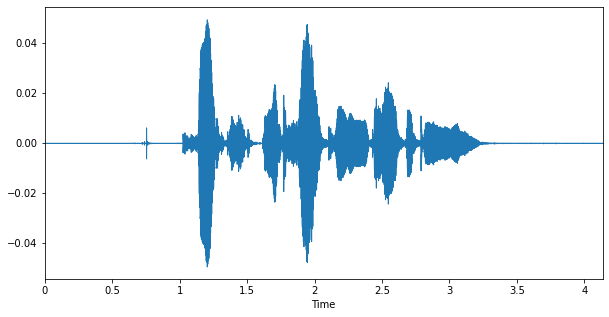

In [ ]:
rutaRuido = "/content/drive/MyDrive/audio_speech_actors_01-24/Actor_02/03-01-02-02-01-01-02.wav"
x , sr = librosa.load(rutaRuido)
plt.figure(figsize=(10,5))
librosa.display.waveplot(x, sr= sr)

In [ ]:
IPython.display.display(IPython.display.Audio(rutaRuido))

**Sin Ruido extremos**

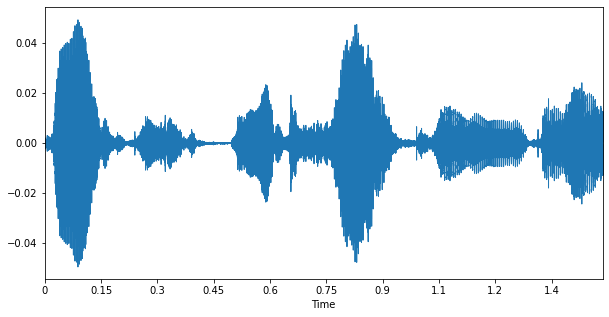

In [ ]:
rutaSinRuidoExt = "/content/drive/MyDrive/SinRuidoExtremos_audio_speech_actors_01-24/Actor_02/03-01-02-02-01-01-02.wav"
x , sr = librosa.load(rutaSinRuidoExt)
plt.figure(figsize=(10,5))
librosa.display.waveplot(x, sr= sr)

In [ ]:
IPython.display.display(IPython.display.Audio(rutaSinRuidoExt))

**Sin ruido general**

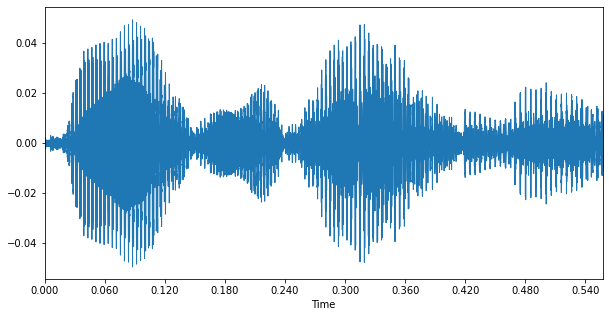

In [ ]:
rutaSinRuidoGen = "/content/drive/MyDrive/SinRuidoGeneral_audio_speech_actors_01-24/Actor_02/03-01-02-02-01-01-02.wav"
x , sr = librosa.load(rutaSinRuidoGen)
plt.figure(figsize=(10,5))
librosa.display.waveplot(x, sr= sr)

In [ ]:
IPython.display.display(IPython.display.Audio(rutaSinRuidoGen))

# **=====================FIN====================================**

In [ ]:
Ravdess = "/content/drive/MyDrive/SinRuido_audio_speech_actors_01-24/"


In [ ]:
ravdess=os.listdir(Ravdess)

emotion=[]
path=[]
gender=[]
intensity=[]
for i in ravdess:
    actor=os.listdir(Ravdess+i)
    for f in actor:
        fsplit= f.split('.')[0]
        fsplit=fsplit.split('-')
        emotion.append(int(fsplit[2]))
        gend=int(fsplit[6])
        if gend%2==0:
            gender.append('Female')
        else:
            gender.append('Male')
        intensity.append(int(fsplit[3]))
        for sp in emotion:
            if sp=="1":
                intensity.append('Normal')
        path.append(Ravdess + i + '/' + f)
edf=pd.DataFrame(emotion, columns=['Emotions'])
pdf=pd.DataFrame(path, columns=['Path'])
gdf=pd.DataFrame(gender, columns=['Gender'])
idf=pd.DataFrame(intensity, columns=['Intensity'])

ravdess_df=pd.concat([edf, pdf, gdf, idf], axis=1)

ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
ravdess_df.Intensity.replace({1:'Normal', 2:'Strong'}, inplace=True)
ravdess_df.head()
ravdess_df.isnull()
ravdess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotions   1316 non-null   object
 1   Path       1316 non-null   object
 2   Gender     1316 non-null   object
 3   Intensity  1316 non-null   object
dtypes: object(4)
memory usage: 41.2+ KB


In [ ]:
ravdess_df[]

,Emotions,Path,Gender,Intensity
0,calm,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal
1,neutral,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal
2,calm,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal
3,calm,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal
4,calm,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Strong
...,...,...,...,...
1311,disgust,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal
1312,fear,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal
1313,disgust,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal
1314,fear,/content/drive/MyDrive/SinRuido_audio_speech_a...,Male,Normal


# **Funcion para extraer las caracteristicas del audio**

In [ ]:
def ExtraerCaracteristicas ( df ): #ingresa df:Dataframe con los path de las rutas de audio , sale dataAudio con las caracteristicas
  dataAudio = pd.DataFrame(columns = ['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy',
       'delta energy_entropy', 'delta spectral_centroid',
       'delta spectral_spread', 'delta spectral_entropy',
       'delta spectral_flux', 'delt a spectral_rolloff', 'delta mfcc_1',
       'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5',
       'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9',
       'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13',
       'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma_4',
       'delta chroma_5', 'delta chroma_6', 'delta chroma_7', 'delta chroma_8',
       'delta chroma_9', 'delta chroma_10', 'delta chroma_11',
       'delta chroma_12', 'delta chroma_std'], index = range(ravdess_df.shape[0]))
  win , step = 0.050 , 0.050

  #for n in range(ravdess_df.shape[0]):
  for n in range(ravdess_df.shape[0]):
    try:
      
      x , sr =  librosa.load(df.Path[n])


      [f , fn] = aF.feature_extraction(x,sr , int(sr * win), int(sr * step))
      temp_dict = {}

      for i , nan in enumerate(fn):
        temp_dict[nan]=[np.mean(f[i])]
        out_vector =pd.DataFrame(temp_dict)
        out_vector
      dataAudio.iloc[n] = out_vector
      out_vector=""

    except ValueError:
      print(n)
    
  return dataAudio




In [ ]:
dato_audio = ExtraerCaracteristicas(ravdess_df)
dato_audio

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,delta zcr,delta energy,delta energy_entropy,delta spectral_centroid,delta spectral_spread,delta spectral_entropy,delta spectral_flux,delt a spectral_rolloff,delta mfcc_1,delta mfcc_2,delta mfcc_3,delta mfcc_4,delta mfcc_5,delta mfcc_6,delta mfcc_7,delta mfcc_8,delta mfcc_9,delta mfcc_10,delta mfcc_11,delta mfcc_12,delta mfcc_13,delta chroma_1,delta chroma_2,delta chroma_3,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std
0,0.085276,0.017457,2.8952,0.17617,0.205179,0.64159,0.011678,0.148014,-25.435144,2.611193,-0.107534,-0.124134,-0.455484,0.481187,-0.121283,0.352318,-0.135044,0.101456,-0.136038,0.02303,-0.001965,0.015713,0.010936,0.039132,0.015336,0.017192,0.024654,0.017753,0.002509,0.009593,0.008999,0.024746,0.01473,0.021443,-0.000538,-0.001074,0.008392,-0.001736,-0.001184,-0.00793,0.00059,0.000403,-0.067303,0.035695,-0.059474,0.007818,0.031952,-0.00547,0.011043,-0.013937,-0.010384,-0.005384,0.017937,0.016728,0.008785,0.000148,-0.00388,-0.000089,0.000062,0.000443,-0.000159,-0.001897,0.000014,0.000287,-0.000296,0.002388,0.000001,-0.000511
1,0.085056,0.019007,2.960505,0.178406,0.20019,0.601847,0.013129,0.146792,-25.533827,2.779554,-0.014254,-0.19128,-0.260252,0.401184,-0.094783,0.330041,-0.074844,0.020216,-0.198333,-0.019703,-0.029374,0.010152,0.008842,0.045163,0.021363,0.024137,0.016292,0.020467,0.002175,0.015385,0.017536,0.012278,0.004694,0.021604,-0.000214,-0.000605,0.000947,-0.000699,-0.000396,0.000773,0.000348,0.000427,-0.012705,0.005909,-0.059258,0.025932,0.009108,0.011594,0.026053,-0.009749,0.002716,-0.01719,0.011536,0.001813,-0.001521,-0.000022,0.000055,0.001349,0.000137,0.00169,0.000115,-0.000615,0.000308,-0.001127,-0.002006,0.001137,0.000035,-0.000001
2,0.093807,0.013282,2.928041,0.174548,0.201768,0.691601,0.00964,0.156874,-25.575179,2.572477,-0.146615,-0.062863,-0.31534,0.490833,-0.106808,0.187231,-0.106919,0.11188,-0.027504,0.025517,-0.003483,0.0166,0.005436,0.037699,0.030564,0.022293,0.013253,0.012403,0.00473,0.012558,0.012453,0.031427,0.005731,0.019352,-0.00088,-0.000429,0.013287,-0.001296,-0.000797,-0.006755,0.000155,0.000284,-0.045081,0.013482,-0.067127,0.023629,0.022551,0.00438,0.052584,-0.014503,-0.014924,-0.010089,-0.003887,0.001078,0.005404,0.000153,-0.000008,-0.000205,0.000346,-0.001397,0.001181,-0.000003,-0.000006,0.000131,-0.000679,0.000447,-0.000131,0.000072
3,0.117439,0.02393,3.003808,0.184688,0.186847,0.744859,0.011767,0.18294,-24.673931,2.48131,-0.09685,-0.043087,-0.654619,0.441575,-0.112132,0.171686,-0.126871,0.057884,-0.068292,0.068588,-0.004769,0.013863,0.005966,0.017785,0.029352,0.037183,0.016377,0.020536,0.005592,0.004167,0.008424,0.019217,0.013599,0.018887,-0.001877,0.000175,0.020469,-0.001761,-0.002321,-0.000291,0.000283,0.000786,-0.002605,0.016788,-0.022885,0.024739,-0.018407,-0.004491,0.006076,0.005772,0.009086,-0.032271,0.029133,-0.00587,0.003911,0.00043,0.000176,0.00057,-0.001082,0.000708,0.000067,-0.000141,-0.000981,-0.000075,-0.000191,-0.000091,0.000037,-0.000182
4,0.071652,0.017077,2.981268,0.162031,0.20058,0.466472,0.01274,0.127092,-25.535976,2.994586,-0.117288,-0.100187,-0.319437,0.337933,0.005718,0.173563,-0.097512,-0.023102,-0.057535,0.004969,0.024868,0.013787,0.009402,0.042631,0.020562,0.029857,0.016132,0.023587,0.001772,0.014378,0.01817,0.012278,0.010008,0.023768,-0.000959,-0.000439,0.012019,-0.001529,-0.001804,-0.001769,0.000156,0.000454,-0.040735,0.017159,-0.064781,0.024894,-0.020855,0.006503,0.024126,-0.028708,0.011235,-0.010011,0.001832,0.00672,0.011239,0.000175,-0.001552,0.000689,0.00049,-0.000013,-0.000825,-0.001238,0.000101,0.00006,-0.000645,-0.000066,

validamos si no hay vacios

In [ ]:
print(dato_audio.isnull().sum())

zcr                  0
energy               0
energy_entropy       0
spectral_centroid    0
spectral_spread      0
                    ..
delta chroma_9       0
delta chroma_10      0
delta chroma_11      0
delta chroma_12      0
delta chroma_std     0
Length: 68, dtype: int64


# Agregramos la columna de emociones

In [ ]:
dato_audio["Emociones"] = ravdess_df.Emotions


In [ ]:
dato_audio

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,delta zcr,delta energy,delta energy_entropy,delta spectral_centroid,delta spectral_spread,delta spectral_entropy,delta spectral_flux,delt a spectral_rolloff,delta mfcc_1,delta mfcc_2,delta mfcc_3,delta mfcc_4,delta mfcc_5,delta mfcc_6,delta mfcc_7,delta mfcc_8,delta mfcc_9,delta mfcc_10,delta mfcc_11,delta mfcc_12,delta mfcc_13,delta chroma_1,delta chroma_2,delta chroma_3,delta chroma_4,delta chroma_5,delta chroma_6,delta chroma_7,delta chroma_8,delta chroma_9,delta chroma_10,delta chroma_11,delta chroma_12,delta chroma_std,Emociones
0,0.085276,0.017457,2.8952,0.17617,0.205179,0.64159,0.011678,0.148014,-25.435144,2.611193,-0.107534,-0.124134,-0.455484,0.481187,-0.121283,0.352318,-0.135044,0.101456,-0.136038,0.02303,-0.001965,0.015713,0.010936,0.039132,0.015336,0.017192,0.024654,0.017753,0.002509,0.009593,0.008999,0.024746,0.01473,0.021443,-0.000538,-0.001074,0.008392,-0.001736,-0.001184,-0.00793,0.00059,0.000403,-0.067303,0.035695,-0.059474,0.007818,0.031952,-0.00547,0.011043,-0.013937,-0.010384,-0.005384,0.017937,0.016728,0.008785,0.000148,-0.00388,-0.000089,0.000062,0.000443,-0.000159,-0.001897,0.000014,0.000287,-0.000296,0.002388,0.000001,-0.000511,calm
1,0.085056,0.019007,2.960505,0.178406,0.20019,0.601847,0.013129,0.146792,-25.533827,2.779554,-0.014254,-0.19128,-0.260252,0.401184,-0.094783,0.330041,-0.074844,0.020216,-0.198333,-0.019703,-0.029374,0.010152,0.008842,0.045163,0.021363,0.024137,0.016292,0.020467,0.002175,0.015385,0.017536,0.012278,0.004694,0.021604,-0.000214,-0.000605,0.000947,-0.000699,-0.000396,0.000773,0.000348,0.000427,-0.012705,0.005909,-0.059258,0.025932,0.009108,0.011594,0.026053,-0.009749,0.002716,-0.01719,0.011536,0.001813,-0.001521,-0.000022,0.000055,0.001349,0.000137,0.00169,0.000115,-0.000615,0.000308,-0.001127,-0.002006,0.001137,0.000035,-0.000001,neutral
2,0.093807,0.013282,2.928041,0.174548,0.201768,0.691601,0.00964,0.156874,-25.575179,2.572477,-0.146615,-0.062863,-0.31534,0.490833,-0.106808,0.187231,-0.106919,0.11188,-0.027504,0.025517,-0.003483,0.0166,0.005436,0.037699,0.030564,0.022293,0.013253,0.012403,0.00473,0.012558,0.012453,0.031427,0.005731,0.019352,-0.00088,-0.000429,0.013287,-0.001296,-0.000797,-0.006755,0.000155,0.000284,-0.045081,0.013482,-0.067127,0.023629,0.022551,0.00438,0.052584,-0.014503,-0.014924,-0.010089,-0.003887,0.001078,0.005404,0.000153,-0.000008,-0.000205,0.000346,-0.001397,0.001181,-0.000003,-0.000006,0.000131,-0.000679,0.000447,-0.000131,0.000072,calm
3,0.117439,0.02393,3.003808,0.184688,0.186847,0.744859,0.011767,0.18294,-24.673931,2.48131,-0.09685,-0.043087,-0.654619,0.441575,-0.112132,0.171686,-0.126871,0.057884,-0.068292,0.068588,-0.004769,0.013863,0.005966,0.017785,0.029352,0.037183,0.016377,0.020536,0.005592,0.004167,0.008424,0.019217,0.013599,0.018887,-0.001877,0.000175,0.020469,-0.001761,-0.002321,-0.000291,0.000283,0.000786,-0.002605,0.016788,-0.022885,0.024739,-0.018407,-0.004491,0.006076,0.005772,0.009086,-0.032271,0.029133,-0.00587,0.003911,0.00043,0.000176,0.00057,-0.001082,0.000708,0.000067,-0.000141,-0.000981,-0.000075,-0.000191,-0.000091,0.000037,-0.000182,calm
4,0.071652,0.017077,2.981268,0.162031,0.20058,0.466472,0.01274,0.127092,-25.535976,2.994586,-0.117288,-0.100187,-0.319437,0.337933,0.005718,0.173563,-0.097512,-0.023102,-0.057535,0.004969,0.024868,0.013787,0.009402,0.042631,0.020562,0.029857,0.016132,0.023587,0.001772,0.014378,0.01817,0.012278,0.010008,0.023768,-0.000959,-0.000439,0.012019,-0.001529,-0.001804,-0.001769,0.000156,0.000454,-0.040735,0.017159,-0.064781,0.024894,-0.020855,0.006503,0.024126,-0.028708,0.011235,-0.010011,0.001832,0.00672,0.011239,0.000175,-0.001552,0.000689,0.00049,-0.000013,-0.000825,-0.001238,0.00

# Exportamos la data en formato EXCEL

In [ ]:
dato_audio.to_excel('SINRUIDOdato_audio.xlsx')

# =============================FIN========================================